In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from scipy.io import loadmat
from KMeans import *

In [2]:
image = loadmat("bird_small.mat")
A = image["A"]

In [3]:
A.shape

(128, 128, 3)

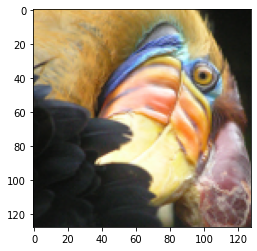

In [4]:
img = plt.imshow(A)

In [5]:
X = (A/255).reshape(A.shape[0]*A.shape[1], 3)

In [6]:
X.shape

(16384, 3)

In [7]:
def CompressedImage(X,K,num_iter):
        kmeans = KMeans(16)
        initial_centriod = kmeans.kMeansInitCentroids(X)
        compressed_Centriod,conpressed_idx = kmeans.runKmeans(X,initial_centriod,10)
        X_Compressed = X.copy()
        for i in range(1,K+1):
            X_Compressed[(conpressed_idx == i).ravel(),:] = compressed_Centriod[i-1]
        return X_Compressed

In [8]:
X_Compressed = CompressedImage(X,16,10)
X_Compressed = X_Compressed.reshape(A.shape[0],A.shape[1],3)
X = X.reshape(A.shape[0],A.shape[1],3)

In [9]:
def plot_image(Original, Compressed):
    fig, ax = plt.subplots(1, 2)
    Img1 = ax[0].imshow(Original)
    Img2 = ax[1].imshow(Compressed)
    for i in range(2):
        title = ["Original", "Compressed"]
        ax[i].set_title(title[i])

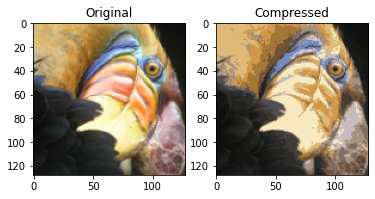

In [10]:
plot_image(X, X_Compressed)